In [11]:
from taipy.gui import Gui
import requests
import pandas as pd

api_key = '10644614d71d570b8fb28c49378b7005'

# Define the FRED API endpoint
base_url = 'https://api.stlouisfed.org/fred/'

# Assign endpoint
obs_endpoint = 'series/observations'

### GDP

In [66]:
# Assign parameters
series_id = 'GDP'
start_date = '2000-01-01'
end_date = '2023-07-01'
ts_frequency = 'q'

obs_params = {
    'series_id': series_id,
    'api_key': api_key,
    'file_type': 'json',
    'observation_start': start_date,
    'observation_end': end_date,
    'frequency': ts_frequency
}

response = requests.get(base_url + obs_endpoint, params=obs_params)

if response.status_code == 200:
    res_data = response.json()
    print(res_data.keys())
    obs_data = pd.DataFrame(res_data['observations'])
    obs_data['date'] = pd.to_datetime(obs_data['date'])
    obs_data.set_index('date', inplace=True)
    if obs_data['value'].dtype == object:
        print('Converting to numeric')
    elif obs_data['value'].dtype == float:
        pass
else:
    print('Failed to retrieve data. Status code:', response.status_code)

print(obs_data.head())

dict_keys(['realtime_start', 'realtime_end', 'observation_start', 'observation_end', 'units', 'output_type', 'file_type', 'order_by', 'sort_order', 'count', 'offset', 'limit', 'observations'])
Converting to numeric
           realtime_start realtime_end      value
date                                             
2000-01-01     2023-12-28   2023-12-28  10002.179
2000-04-01     2023-12-28   2023-12-28   10247.72
2000-07-01     2023-12-28   2023-12-28  10318.165
2000-10-01     2023-12-28   2023-12-28  10435.744
2001-01-01     2023-12-28   2023-12-28  10470.231


In [67]:
#drop realtime_start and realtime_end
obs_data.drop(['realtime_start', 'realtime_end'], axis=1, inplace=True)

print(obs_data.head())

                value
date                 
2000-01-01  10002.179
2000-04-01   10247.72
2000-07-01  10318.165
2000-10-01  10435.744
2001-01-01  10470.231


In [68]:
for i in obs_data.index:
    if obs_data.loc[i, 'value'] == '.':
        obs_data.drop(i, inplace=True)
obs_data['value'] = obs_data['value'].astype(float)

In [69]:
print(obs_data.tail(2))

                value
date                 
2023-04-01  27063.012
2023-07-01  27610.128


In [70]:
#export dateset out
obs_data.to_csv('fred-gdp-q.csv')

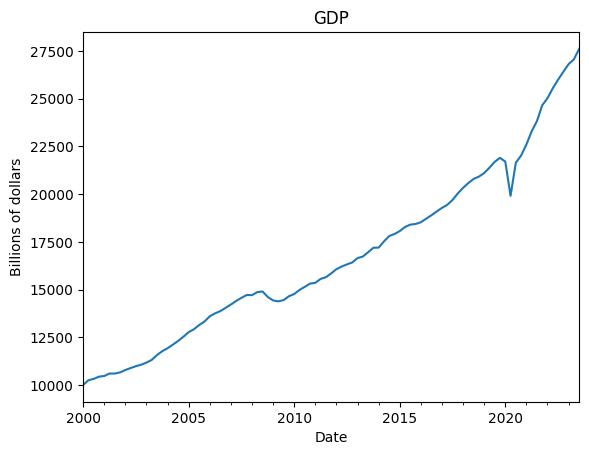

In [71]:
plot = obs_data.plot(title='GDP', legend=False)
plot.set_xlabel('Date')
plot.set_ylabel('Billions of dollars')
plot.figure.savefig('fred-gdp-q.png')

### CPIAUCSL

In [12]:
# Assign parameters
series_id = 'CPIAUCSL'
start_date = '2000-01-01'
end_date = '2023-07-01'
ts_frequency = 'm'

obs_params = {
    'series_id': series_id,
    'api_key': api_key,
    'file_type': 'json',
    'observation_start': start_date,
    'observation_end': end_date,
    'frequency': ts_frequency
}

response = requests.get(base_url + obs_endpoint, params=obs_params)

if response.status_code == 200:
    res_data = response.json()
    print(res_data.keys())
    obs_data = pd.DataFrame(res_data['observations'])
    obs_data['date'] = pd.to_datetime(obs_data['date'])
    obs_data.set_index('date', inplace=True)
    obs_data['value'] = obs_data['value'].astype(float)
else:
    print('Failed to retrieve data. Status code:', response.status_code)

print(obs_data.head())

dict_keys(['realtime_start', 'realtime_end', 'observation_start', 'observation_end', 'units', 'output_type', 'file_type', 'order_by', 'sort_order', 'count', 'offset', 'limit', 'observations'])
           realtime_start realtime_end  value
date                                         
2000-01-01     2023-12-28   2023-12-28  169.3
2000-02-01     2023-12-28   2023-12-28  170.0
2000-03-01     2023-12-28   2023-12-28  171.0
2000-04-01     2023-12-28   2023-12-28  170.9
2000-05-01     2023-12-28   2023-12-28  171.2


In [13]:
#drop realtime_start and realtime_end
obs_data.drop(['realtime_start', 'realtime_end'], axis=1, inplace=True)

print(obs_data.head())

            value
date             
2000-01-01  169.3
2000-02-01  170.0
2000-03-01  171.0
2000-04-01  170.9
2000-05-01  171.2


In [14]:
# export dateset out
obs_data.to_csv('fred-cpiaucs-m.csv')

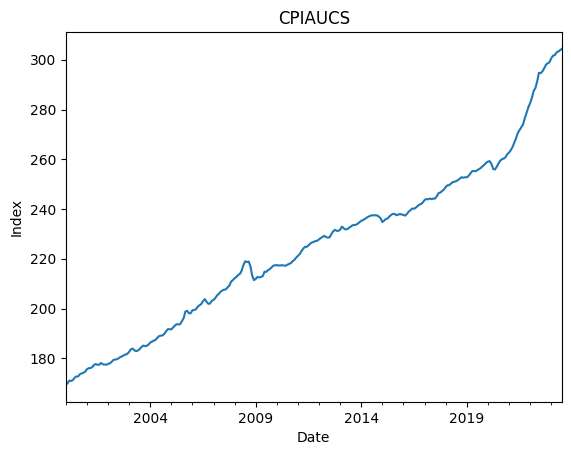

In [15]:
# plot
plot = obs_data.plot(title='CPIAUCS', legend=False)
plot.set_xlabel('Date')
plot.set_ylabel('Index')
plot.figure.savefig('fred-cpiaucs-m.png')